In [13]:
import sys 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import warnings
import seaborn as sns
# To suppress all warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
#import scaler
from sklearn.preprocessing import StandardScaler

In [2]:
%load_ext autoreload
%autoreload 2
from database import Magneticum
from relation import Scaling
from relation import Distribution
from relation import Analysis
from relation import RandomForest

In [3]:
def data_manupulation(df):
    dff = df.copy()
    dff = dff[['Yksz','M','gas_frac','Vz']]
    q_list = [0,0.25,0.5,0.75,1]
    labels = [1,2,3,4]
    dff['M_q'] = pd.qcut(dff['M'],q=q_list,labels=labels)
    return dff
def SS(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

In [4]:
snaps = ['140','132','096']

In [5]:
boxno = 50

In [6]:
df_140 = Analysis(boxno,'140','').get_dataframe()


In [7]:
df_140_m = data_manupulation(df_140)

In [8]:
df_140_ms = SS(df_140_m)

In [9]:
df_140_ms

,Yksz,M,gas_frac,Vz,M_q
0,3.785629,5.970635,5.078922,-1.390367,1.341718
1,3.579983,5.259511,4.574609,-1.816945,1.341718
2,3.265185,5.594615,4.972068,-0.155893,1.341718
3,3.050523,3.487114,4.303074,0.253080,1.341718
4,3.012627,5.325033,4.433476,-1.325993,1.341718
...,...,...,...,...,...
10488,-0.772869,-1.113360,1.138365,-0.593155,-1.341462
10489,-0.103052,-1.077766,0.543450,-0.845292,-1.341462
10490,-0.532824,-1.091878,-0.399874,0.719765,-1.341462
10491,0.731956,-1.026046,1.654220,1.507760,-1.341462


In [14]:
X = df_140_ms[['gas_frac','Vz']]
y = df_140_ms['Yksz'] - df_140_ms['M']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=df_140_m.M_q, random_state=42)

In [12]:
model = PySRRegressor(
    niterations=10,  
    binary_operators=["+", "*", "/", "^"],
    unary_operators=[
        "exp",
        "abs",
        "sqrt",
    ],
    procs=4,
    maxdepth=10,
    progress=True,
)

In [68]:
model.fit(X_train, y_train)

Started!

Cycles per second: 5.050e+03
Head worker occupation: 2.9%
Progress: 14 / 150 total iterations (9.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           7.917e-01  -1.000e-10  0.016088057
3           7.530e-01  2.508e-02  (-0.18235476 * gas_frac)
4           5.778e-01  2.649e-01  (abs(Vz) + -0.83143383)
5           5.585e-01  3.399e-02  (sqrt(abs(Vz)) + -0.83143383)
7           5.389e-01  1.783e-02  ((sqrt(abs(Vz)) + -0.83143383) * 1.2623222)
9           5.358e-01  2.866e-03  (((sqrt(abs(Vz)) + -0.83143383) * 1.2164766) * 1.2164766)
11          5.230e-01  1.207e-02  (abs(Vz / exp(abs(exp(gas_frac)) * 0.2309557)) + -0.5612451)
15          5.185e-01  2.167e-03  (abs((abs(Vz) * -0.89899564) / sqrt(exp(abs(exp(gas_frac)) * 0.2309557))) + -0.5612451)
18          5.160e-01  1.617e-03  (((abs(Vz / (0.7322526 + 0.91877514)) + (-0.1661067 * 1.5456293)) + (-0.1661067 * (0.91877514 + gas_frac))) / 0.8346921)
19          5.090e-

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                        0.016088057   
	1        0.025247                           (gas_frac * -0.19810383)   
	2  >>>>  0.273097                            (abs(Vz) + -0.76125395)   
	3        0.028302                      (sqrt(abs(Vz)) + -0.79137576)   
	4        0.032476               ((abs(Vz) ^ 0.7185264) + -0.7647494)   
	5        0.011442        ((sqrt(abs(Vz)) + -0.79628265) * 1.4369155)   
	6        0.012505  ((sqrt(abs(Vz)) + -0.83143383) + (gas_frac * -...   
	7        0.002557  ((sqrt(abs(abs(Vz))) + -0.8092674) + (gas_frac...   
	8        0.013067  ((abs(Vz / exp(0.3002458 * gas_frac)) ^ 0.6640...   
	9        0.029946  (((abs(Vz) / 1.2752353) + (sqrt(exp(gas_frac))...   
	
	       loss  complexity  
	0  0.791711           1  
	1  0.752727           3  
	2  0.572839           4  
	3  0.556855           5  
	4  0.539061           6  
	5  0.532928           7  
	6  0.519764           9  
	7  0.518437          10  
	8  0.511706          11  
	9  0.496610          12  
]

In [91]:
for i in range(9):
    print(model.sympy(i))

0.0160880570000000
-0.19810383*gas_frac
Abs(Vz) - 0.76125395
sqrt(Abs(Vz)) - 0.79137576
Abs(Vz)**0.7185264 - 0.7647494
1.4369155*sqrt(Abs(Vz)) - 1.14419088216607
-0.14833386*gas_frac + sqrt(Abs(Vz)) - 0.83143383
-0.14833386*gas_frac + sqrt(Abs(Vz)) - 0.8092674
-0.7450802 + exp(-0.19936942628806*re(gas_frac))*Abs(Vz)**0.6640207


In [85]:
model.sympy()

Abs(Vz) - 0.76125395

['29.9', '30.8', '31.6', '32.4', '33.3', '34.1', '34.9']

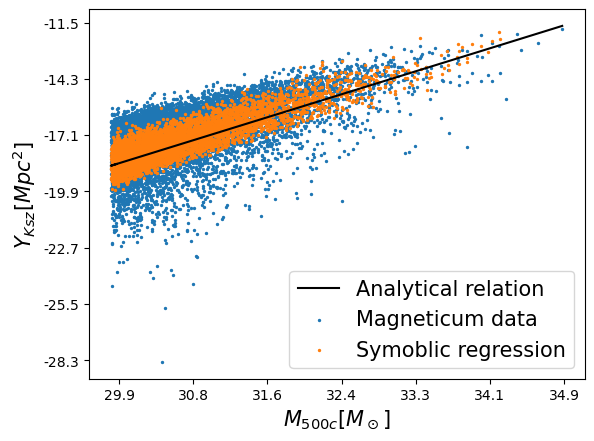

In [66]:
plt.scatter(df_140_ms.M,df_140_ms.Yksz,s=2,label='Magneticum data')
plt.scatter(df_140_ms.M,0.8*df_140_ms.M - 0.14*df_140_ms.gas_frac + np.sqrt(df_140_ms.Vz)  - 1, s=2,label='Symoblic regression')
plt.plot(df_140_ms.M,df_140_ms.M*.7 -.3,c='k',label='Analytical relation')
plt.ylabel('$Y_{Ksz} [Mpc^2]$',fontsize=15)
plt.xlabel('$M_{500c} [M_\odot]$',fontsize=15)
plt.xticks(np.linspace(-1,6,7),[f"{i:.1f}" for i in np.linspace(min(df_140_m.M),max(df_140_m.M),7)],fontsize=10)
plt.yticks(np.linspace(-8,4,7),[f"{i:.1f}" for i in np.linspace(min(df_140_m.Yksz),max(df_140_m.Yksz),7)],fontsize=10)
plt.legend(loc='lower right',fontsize=15)
plt.savefig('test5.pdf',dpi=300,bbox_inches='tight')
#plt.scatter(df_140_ms.M,(df_140_ms.M - 2*np.abs(df_140_ms.Vz) )

In [55]:
min(df_140_m.M)

29.93931559360903

In [63]:
df_140_m.Yksz

0       -11.521859
1       -11.813518
2       -12.259982
3       -12.564427
4       -12.618172
           ...    
10488   -17.986969
10489   -17.036998
10490   -17.646525
10491   -15.852745
10492   -16.993518
Name: Yksz, Length: 10493, dtype: float64